# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix


#  Loading Dataset

In [2]:
df = pd.read_csv("C:\\Users\\joshi\\Desktop\\Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# Basic Understanding of Data

In [5]:
df.shape

(150, 6)

In [6]:
df.dtypes.to_frame().rename(columns={0:"Data-Types"})

,Data-Types
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


# observation
1.From above output we can observe that except the species feature all the features are having numerical data-types

2.All the features are having correct data-types. So we don't have to do any changes

In [7]:

df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


# observation
1. We can observe that none of the features is having missing values


In [8]:
df.duplicated().sum()

0

# Exploratory Data Analysis(EDA)

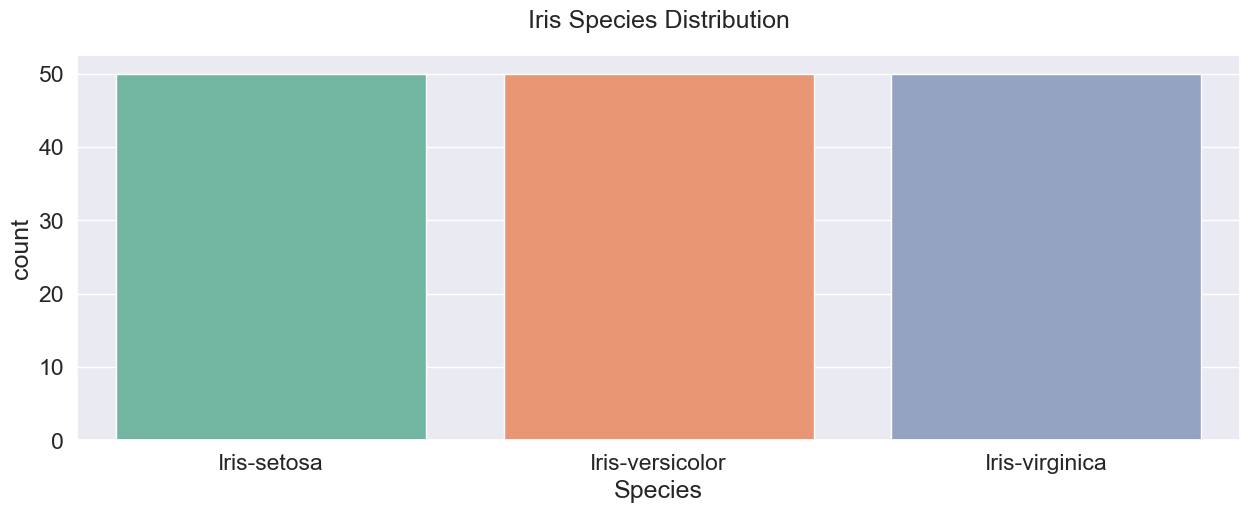

In [9]:
plt.figure(figsize=(15,5))
sns.countplot(df["Species"],data=df,palette="Set2")
plt.title("Iris Species Distribution",pad=20)
plt.show()

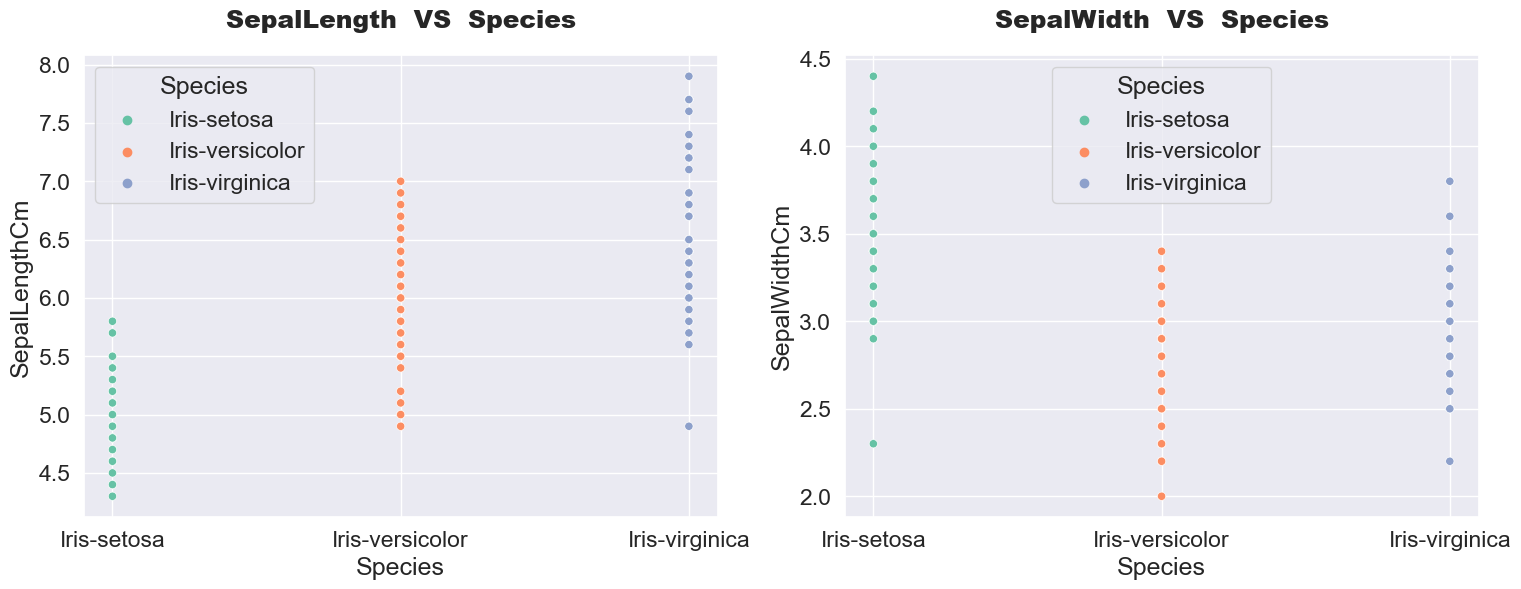

In [10]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.scatterplot("Species","SepalLengthCm",data=df,hue="Species",palette="Set2")
plt.title("SepalLength  VS  Species",pad=20,fontweight="black")
plt.subplot(1,2,2)
sns.scatterplot("Species","SepalWidthCm",data=df,hue="Species",palette="Set2")
plt.title("SepalWidth  VS  Species",pad=20,fontweight="black")
plt.show()

 # observation
 
1.For Iris-setosa we can observe that this flower species are having sepal length less than 6cm and sepal width less than 5cm.

2.Iris-setosa is having the smallest sepal length among the three species but the Sepal width is argest among the three species.

3.For Iris-versicolor we can observe that the sepal length is greater than 4.5cm but less than 7cm and sepal width less than 3.5cm.

4.Iris-versicolor is having the largest sepal length.



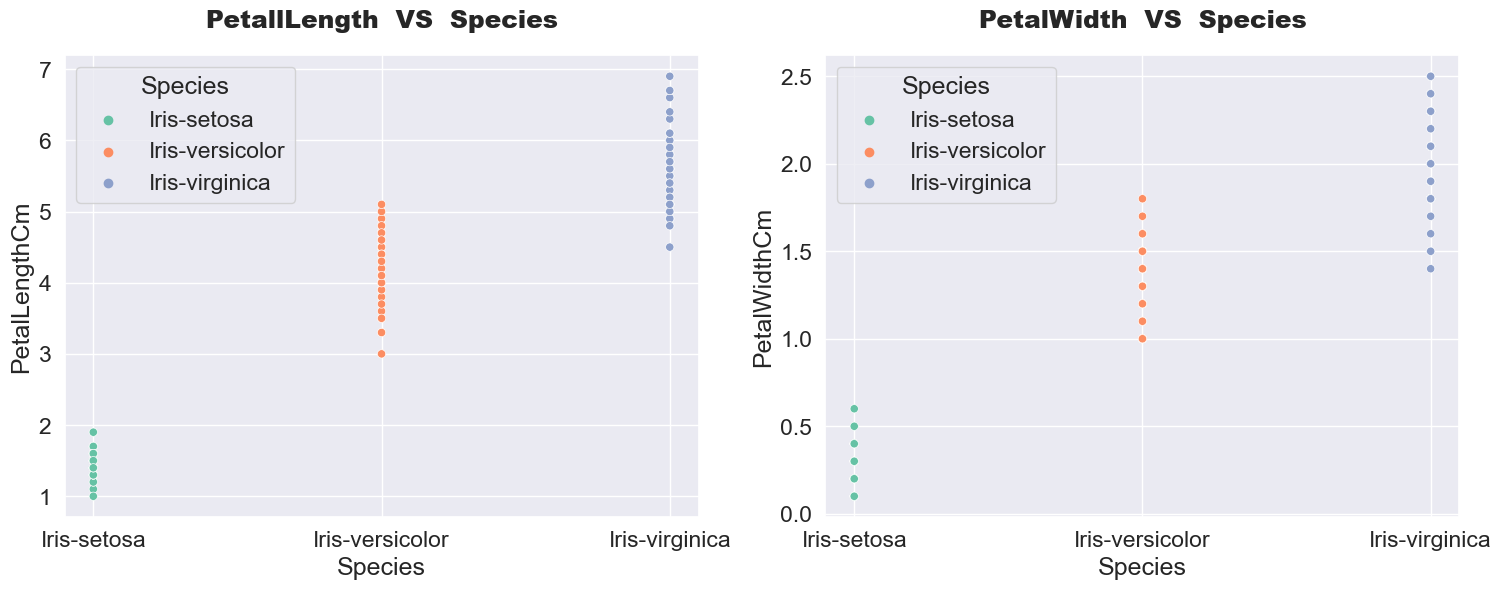

In [11]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.scatterplot("Species","PetalLengthCm",data=df,hue="Species",palette="Set2")
plt.title("PetallLength  VS  Species",pad=20,fontweight="black")
plt.subplot(1,2,2)
sns.scatterplot("Species","PetalWidthCm",data=df,hue="Species",palette="Set2")
plt.title("PetalWidth  VS  Species",pad=20,fontweight="black")
plt.show()

# observation

1.For Iris-setosa we can observe that this flower species are having petal length less than 2cm and Petal width less than 1cm.

2.Iris-setosa is having the smallest Petal length & Petal Width among the three species.

3.Iris-versicolor is having the almost avergae values for Petal width & Petal Length.

4.Iris-versicolor is having the largest Petal length & Petal Width.


   # Data Pre-processing

In [12]:
x = df.drop(columns=["Species", "Id"])
y = df["Species"]

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
print(x_train.shape,y_train.shape)

(120, 4) (120,)


print(x_test.shape,y_test.shape)

# Model Building

In [17]:
# Logistic Regression Model
clf = LogisticRegression()

In [18]:
clf.fit(x_train,y_train)

LogisticRegression()

In [19]:
train_pred = clf.predict(x_train)
test_pred = clf.predict(x_test)

In [20]:
print("Accuraacy on Training Data is: ",accuracy_score(y_train,train_pred)*100)

Accuraacy on Training Data is:  97.5


In [21]:
print("Accuracy on Tetsing Data is:",accuracy_score(y_test,test_pred)*100)

Accuracy on Tetsing Data is: 100.0


# observation
1.We can clearly observe that we got an accuracy of 97 on training data and 100 on testing data.

2.So we can conclude that our model is having a kind of best fitting.

In [22]:
cm = confusion_matrix(y_test,test_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

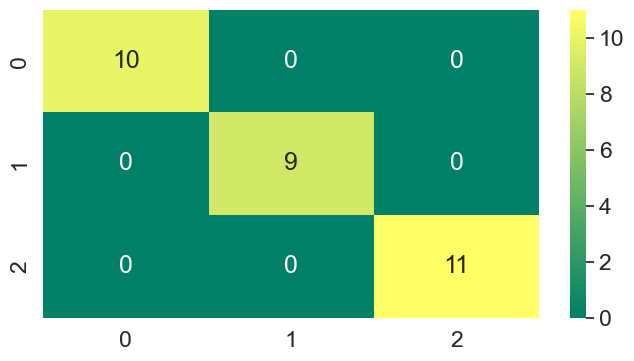

In [23]:
plt.figure(figsize=(8,4))
sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
plt.show()